In [1]:
import gymnasium as gym
import random
import numpy as np
import matplotlib.pyplot as plt
import pygame
import csv


In [2]:
env=gym.make("Taxi-v3", render_mode="human")
env.reset()
env.render()

In [47]:
episodes=5
alpha=0.8
gamma=0.9
epsilon=0.001
num_rows=env.observation_space.n
num_columns=env.action_space.n
qtable=np.zeros((num_rows,4,5,num_columns))
print(qtable)
qtable=np.load('qvaluesusingQLearning.npy')
print(qtable)

[[[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0

In [48]:
outcomes=[]
countlist=[]
for epi in range(episodes):
    state=env.reset()
    state=state[0]
    statecopy=state
    done=False
    curr_outcome="Failure"
    outcomes.append(curr_outcome)
    counter=0
    while not done:
        counter=counter+1
        if np.random.uniform(0,1)<epsilon:
            action=env.action_space.sample()
        elif np.max(qtable[state,state%4,(statecopy//4)%5])>0:
            action=np.argmax(qtable[state,state%4,(statecopy//4)%5])
        else:
            action=env.action_space.sample()
        new_state, reward, terminated, truncated, info=env.step(action)
        done= truncated or terminated
        qtable[state,state%4,(statecopy//4)%5,action] = qtable[state,state%4,(statecopy//4)%5,action]+alpha*(reward+gamma*np.max(qtable[new_state,new_state%4,(statecopy//4)%5])-qtable[state,state%4,(statecopy//4)%5,action])
        state=new_state
        if reward==20:
            outcomes[-1]="Success"
    countlist.append(counter) 
print(qtable)
np.save('qvaluesusingQLearning.npy',qtable)
        

[[[[  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]]

  [[  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]]

  [[  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0.           0.
      0.        ]
   [  0.           0.           0.           0. 

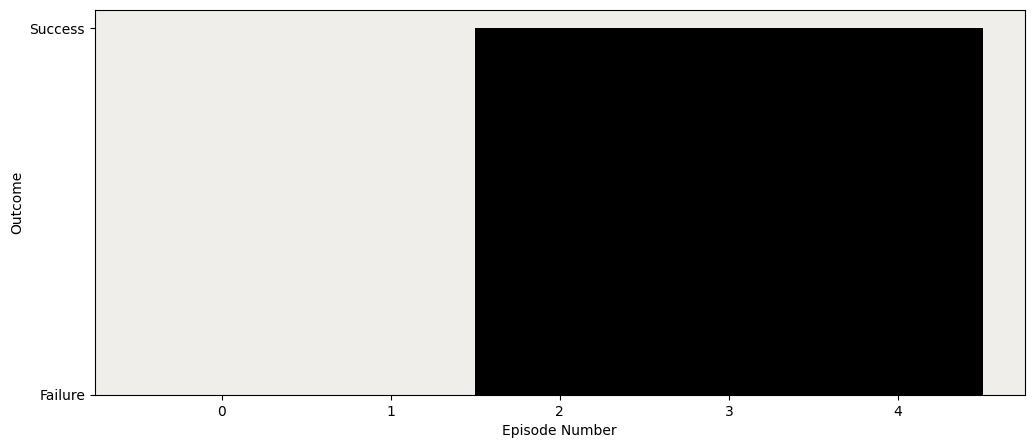

In [49]:
plt.figure(figsize=(12,5))
plt.xlabel("Episode Number")
plt.ylabel("Outcome")
ax=plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="black",width=1)
plt.show()

In [50]:
print(outcomes)
print(countlist)

['Failure', 'Failure', 'Success', 'Success', 'Success']
[200, 200, 40, 21, 77]
